In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

magnitudes = np.load('./spectrogram.npy')
all_magnitudes = np.concatenate((magnitudes,np.flip(magnitudes,axis=1)),axis = 1)
phases = np.load('./phases.npy')
step_size = 2000
window_size = 2000

FileNotFoundError: [Errno 2] No such file or directory: './spectrogram.npy'

Text(0.5, 1.0, 'Spectrogram with window size:2000and step size:2000')

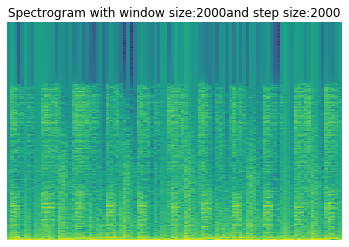

In [3]:
plt.pcolormesh(np.transpose(all_magnitudes)[:all_magnitudes.shape[1]//2])
plt.yscale("linear")
plt.axis('off')
plt.title("Spectrogram with window size:"+str(window_size)+"and step size:"+str(step_size))

In [4]:
length_audio = len(magnitudes)*step_size
audio = np.empty(length_audio)

In [5]:
all_magnitudes = np.concatenate((magnitudes,np.flip(magnitudes,axis=1)),axis = 1)
all_magnitudes = np.power(10,all_magnitudes/10)+0.001
my_thing = all_magnitudes*phases
for i in range(my_thing.shape[0]):
    window = my_thing[i]
    audio[i*window_size:(i+1)*window_size] = np.fft.ifft(window).real
wavfile.write("audio.wav",44100,data=audio)
ipd.Audio('audio.wav')

In [440]:
def get_spectrogram(audio,window_size,step_size):
    i = 0;j=0
    spectrogram = np.zeros((len(audio)//window_size,window_size))
    while(i<(length_audio-window_size)):
        window = audio[i:i+window_size]
        window_fft = abs(np.fft.fft(window))
        spectrogram[j] = window_fft
        i = i + step_size
        j = j + 1
    spectrogram = 10*np.log10(spectrogram+0.01)
#   return np.transpose(spectrogram)[:spectrogram.shape[1]//2]
    return spectrogram
def show_spectrogram(audio,window_size,step_size):
    spectrogram = get_spectrogram(audio,window_size,step_size)
    plt.pcolormesh(np.transpose(spectrogram)[:spectrogram.shape[1]//2])
    plt.yscale("linear")
    plt.axis('off')
    plt.title("Spectrogram with window size:"+str(window_size)+"and step size:"+str(step_size))

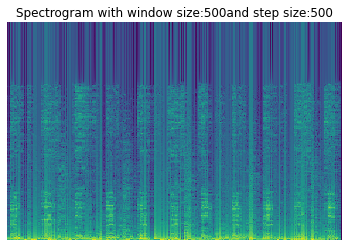

In [441]:
show_spectrogram(audio,500,500)

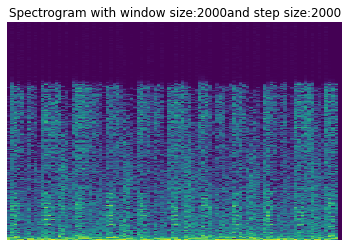

In [442]:
show_spectrogram(audio,2000,2000)

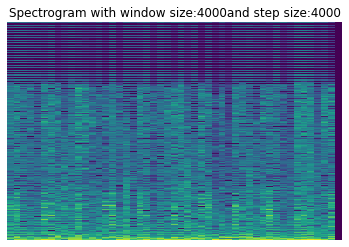

In [443]:
show_spectrogram(audio,4000,4000)